<a href="https://colab.research.google.com/github/Shubhankitsirvaiya/Cardiovascular_classification/blob/main/Team_Mind_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning - Capstone Project 1 - Cardiovascular Risk Prediction**

### **Problem Statement** <br>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. <br>

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

### **Data Description**

#### **Demographic:**
* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

#### **Behavioral:**
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### **Medical( history):**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

#### **Medical(current):**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

#### **Predict variable (desired target):**
**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

### Load the data

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 4: Machine Learning/Capstone Projects/Cardiovascular Risk Prediction - Nikhila N S/data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# check missing-values

df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

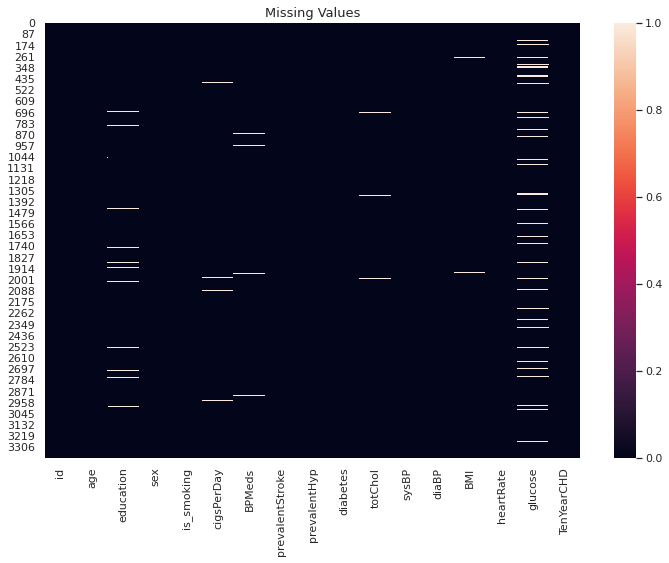

In [ ]:
# Heat Map for missing values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.title('Missing Values', fontsize=13)
plt.show()

* We have missing values in Education, cigPerDay, BPMeds, totChol, BMI, heartRate and glucose
* We will analyse these further in the later sections to check how to handle these missing values.
* We can use imputation of the missing values in detail , when we do feature engg later, where we will look into each features' null value in detail

In [ ]:
# list of features in data

df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# creating list for numeric and categorical features
# id is a unique identifier; not considering

num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
cat_cols = ['education', 'sex','is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [ ]:
# quick look at numeric features

df[num_cols].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3368.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000
mean,49.542183,9.069477,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520
std,8.592878,11.879078,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753
min,32.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,20.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000


In [ ]:
# quick look at categorical features

df[cat_cols].describe(include = 'all')

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,3303.000000,3390,3390,3346.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NO,NaN,NaN,NaN,NaN,NaN
freq,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN
mean,1.970936,NaN,NaN,0.029886,0.006490,0.315339,0.025664,0.150737
std,1.019081,NaN,NaN,0.170299,0.080309,0.464719,0.158153,0.357846
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
# check duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


We have no duplicate records

### Exploratory Data Analysis

#### Checking class imbalance

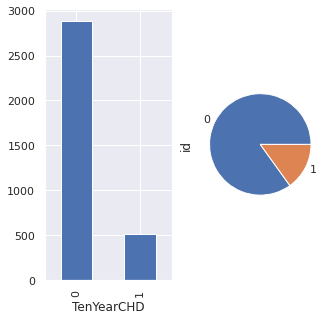

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
df.groupby("TenYearCHD")['id'].count().plot.bar()

plt.subplot(122)
df.groupby("TenYearCHD")["id"].count().plot.pie(figsize=(5,5))

plt.show()

In [ ]:
print("-> 10-year risk of coronary heart disease CHD - True {}%".format(100-round(df['TenYearCHD'].mean()*100),2))
print("-> 10-year risk of coronary heart disease CHD - False {}%".format(round(df['TenYearCHD'].mean()*100),2))

-> 10-year risk of coronary heart disease CHD - True 85%
-> 10-year risk of coronary heart disease CHD - False 15%


**Data is heavily imbalanced**

We will have to handle the class imbalance before modeling. 

#### Univariate Analysis

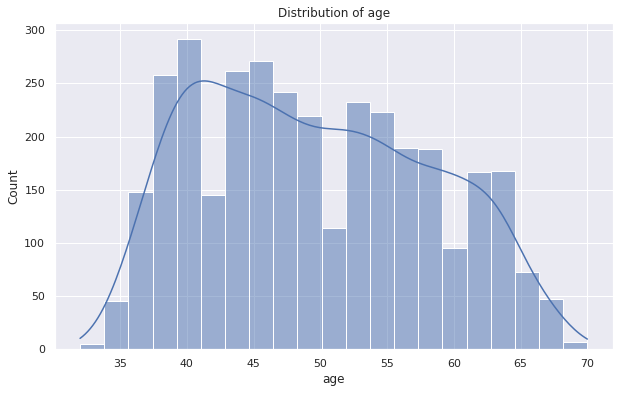

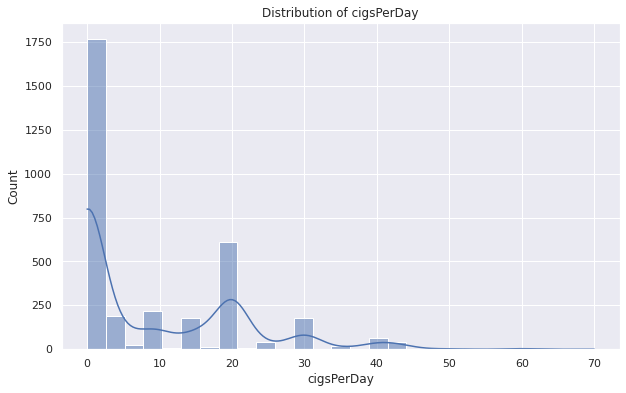

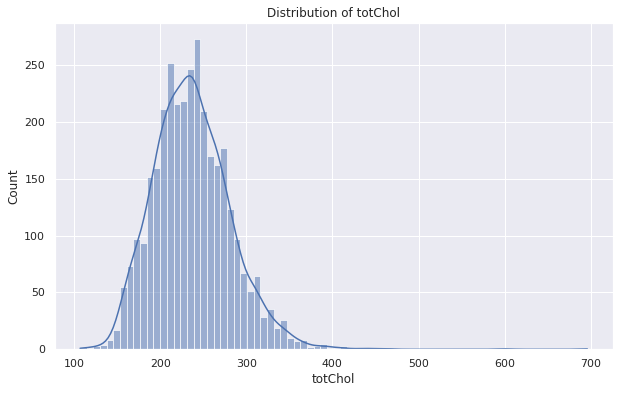

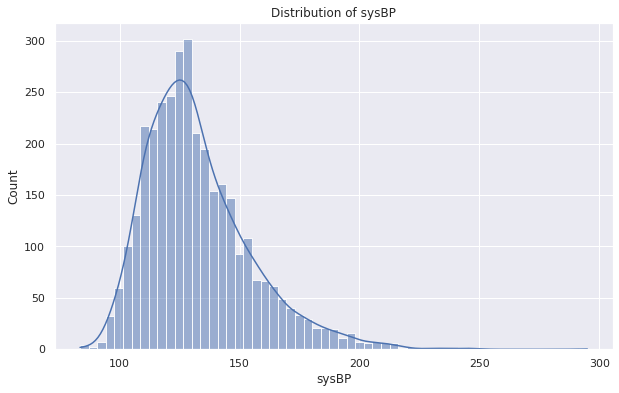

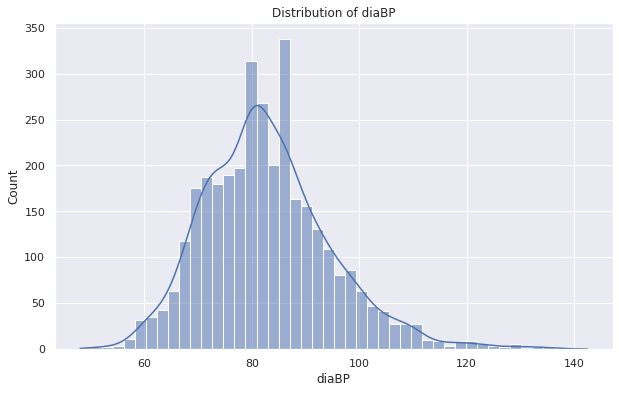

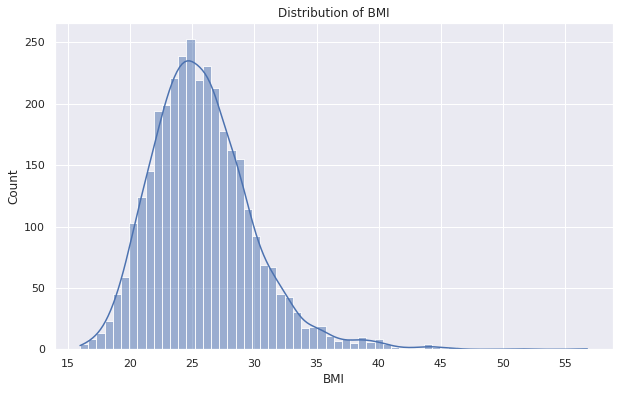

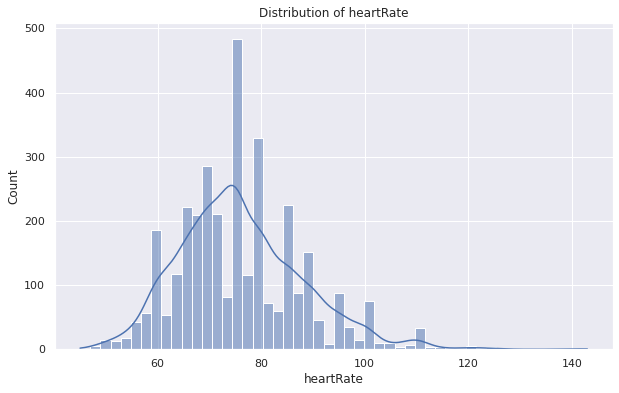

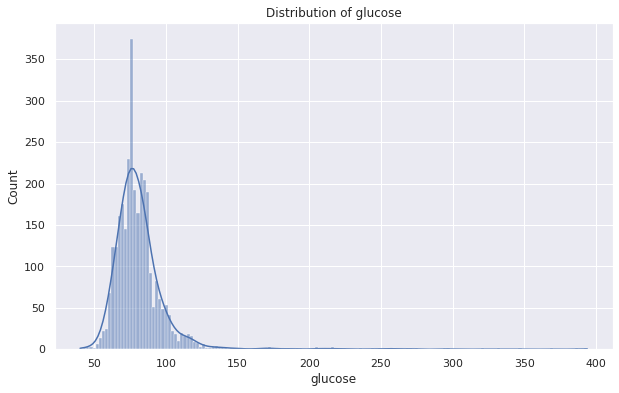

In [ ]:
# visualize the distributions for Numeric Features

for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii, kde=True)
  plt.title(f'Distribution of {ii}')
  plt.show()

The distribution of mostly seems normal, but also right skewed, so we can use transformation techniques like log tranformation to deal with skewness

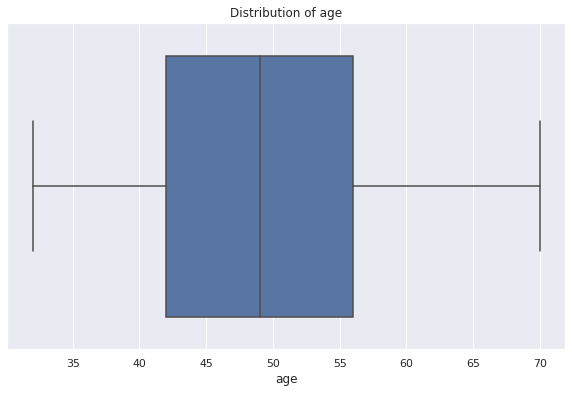

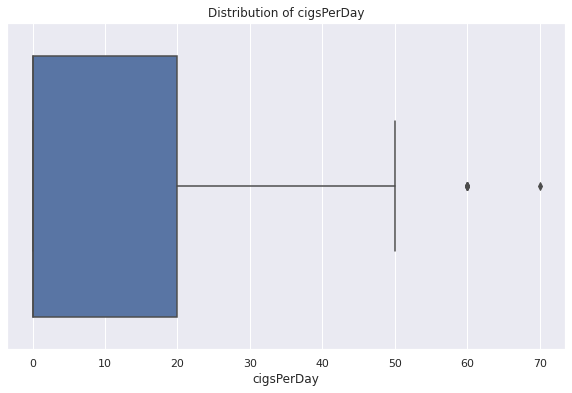

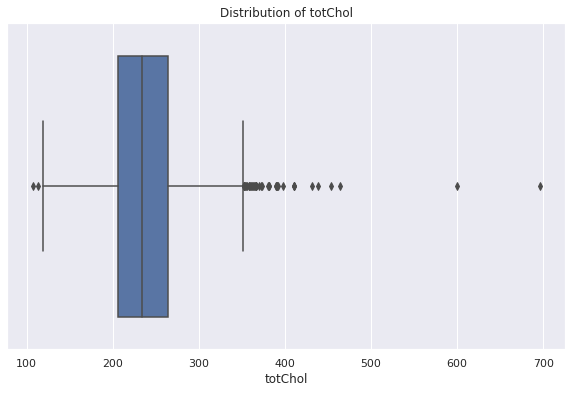

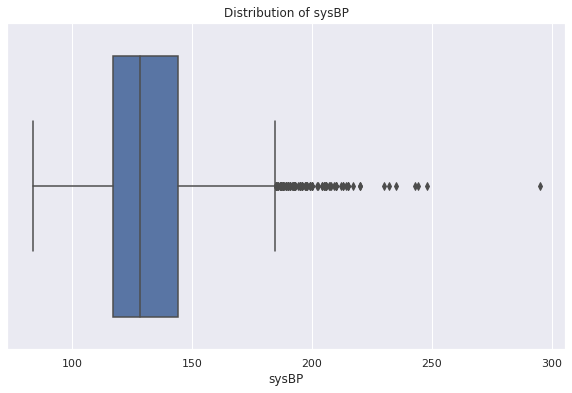

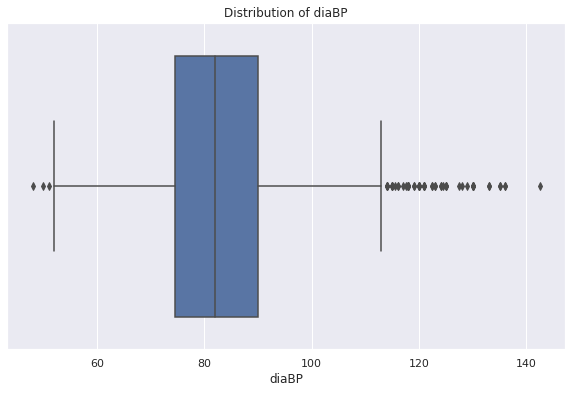

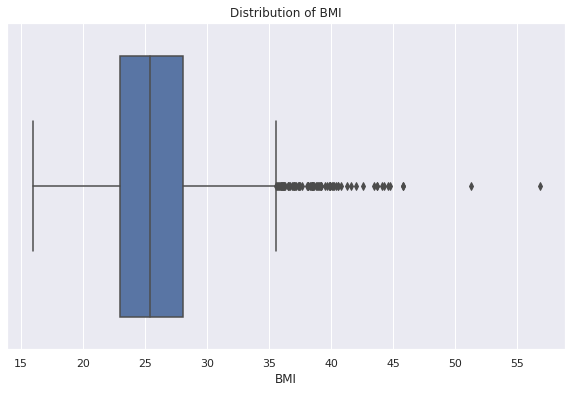

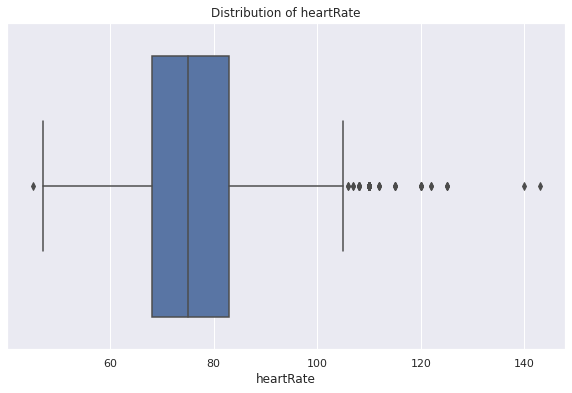

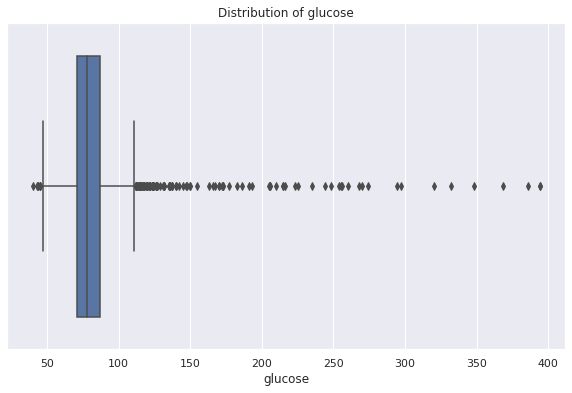

In [ ]:
# Box plot for Numeric Features

for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  sns.boxplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

From our standard approach , we classify a point as an outlier if :

- its characteristic is very different from the other points in same field 
- its occurence is rare

And generally we say that the points which are outiside the whiskers  of boxplot are classified as outliers; but here we see in most plots , the range of the data is as such classifying out of the whisker points as outliers does not seems to be a viable options.

So we will keep the values as of now , and later we can try training the model without these points

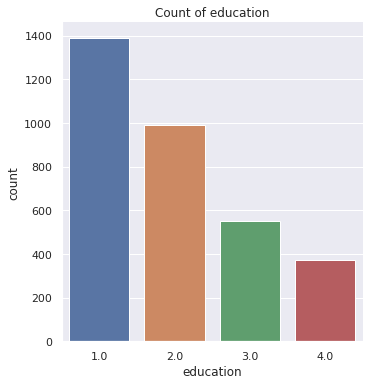

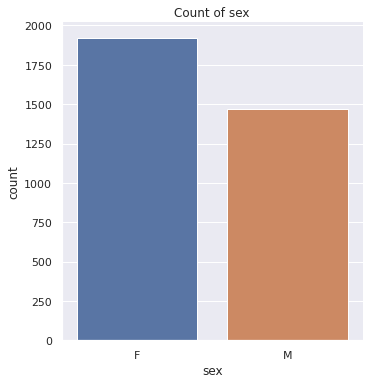

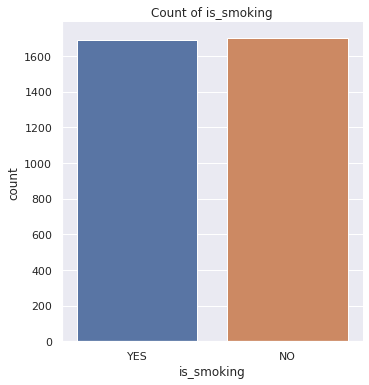

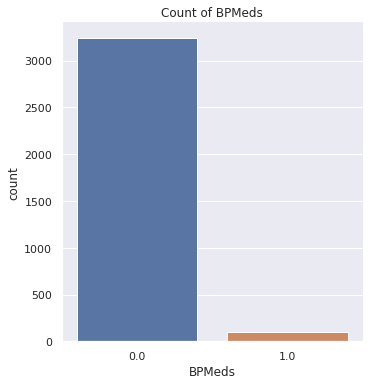

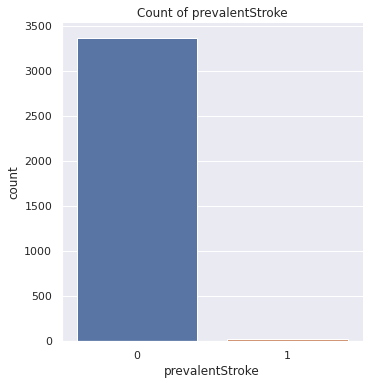

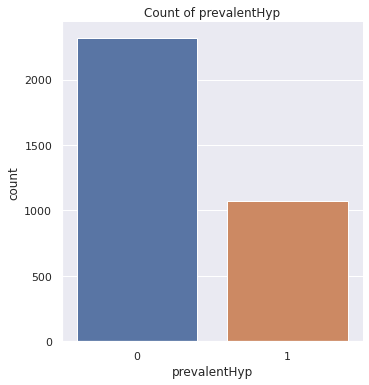

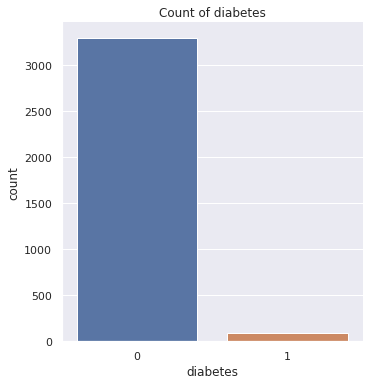

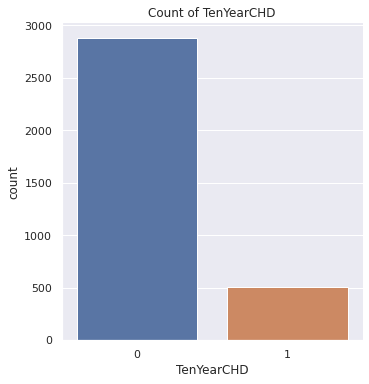

In [ ]:
# Categorical Features

for i, ii in enumerate(cat_cols):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, kind='count')
  plt.title(f'Count of {ii}')
  plt.show()

* We have an imbalanced dataset
* We will have to handle this before modelling

In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

#### Bivariate Analysis



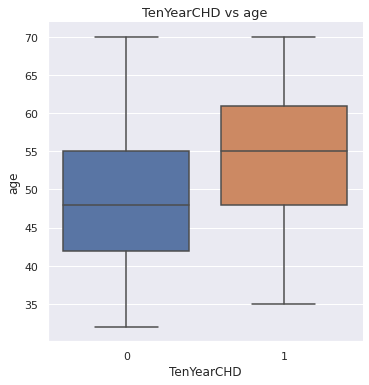

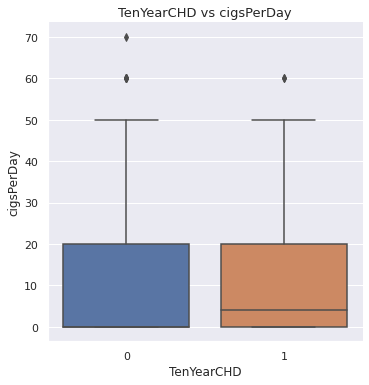

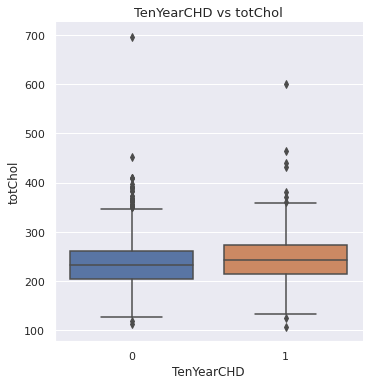

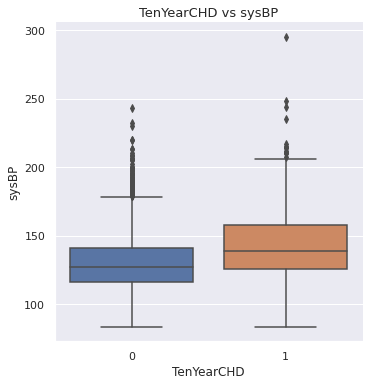

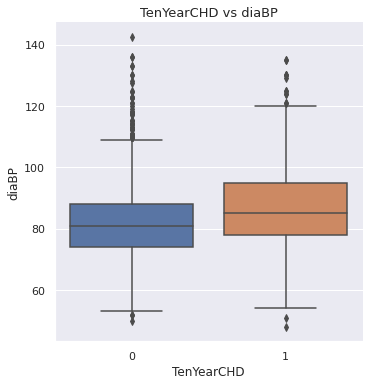

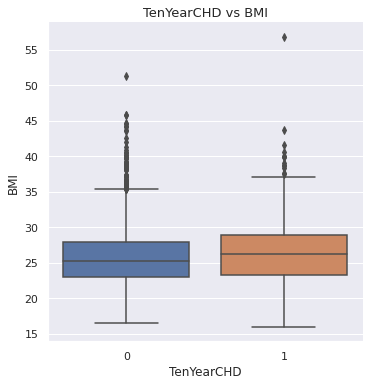

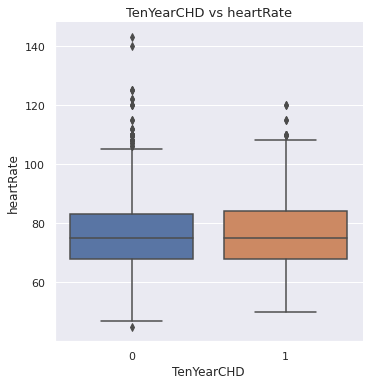

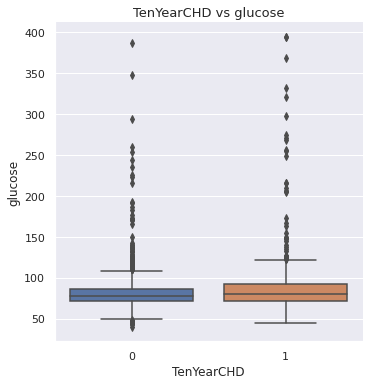

In [ ]:
# Dependent Variable vs numeric features
for i, ii in enumerate(num_cols):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, y=ii, x=cat_cols[-1], kind='box')
  plt.title(f'TenYearCHD vs {ii}', fontsize=13)
  plt.show()

* We can see that the mean age of people who have a 10-year risk of CHD is higher than those without the risk.
* The average sysBP and diaBP is also higher for those who are classified as having risk of CHD

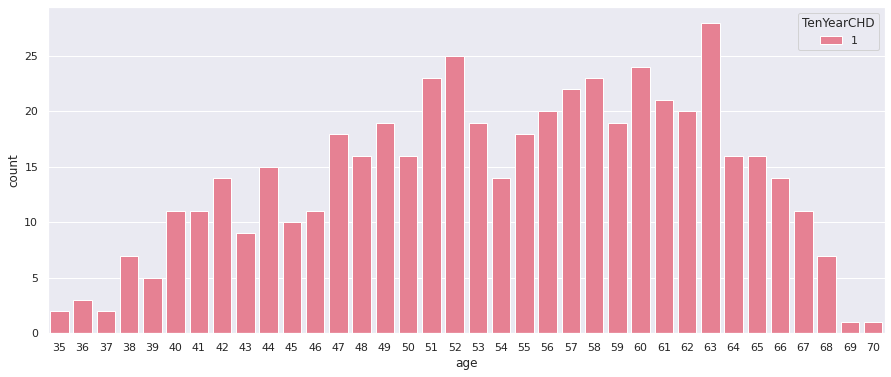

In [ ]:
# TenYearCHD = Yes vs Age

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df[df['TenYearCHD']==1], hue = 'TenYearCHD', palette='husl')
plt.show()

People with highest risk of developing CHD are between the ages of 51 and 63

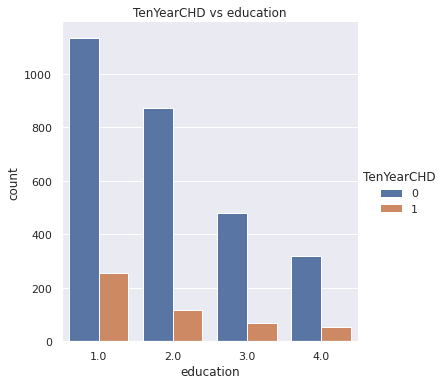

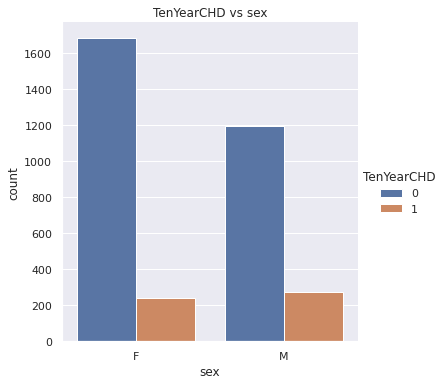

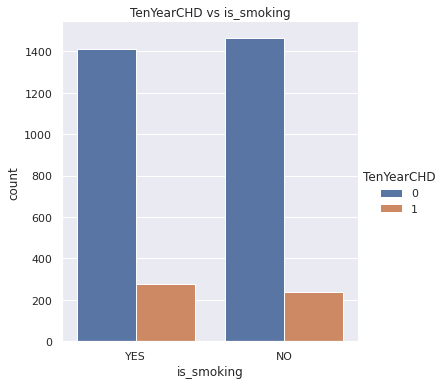

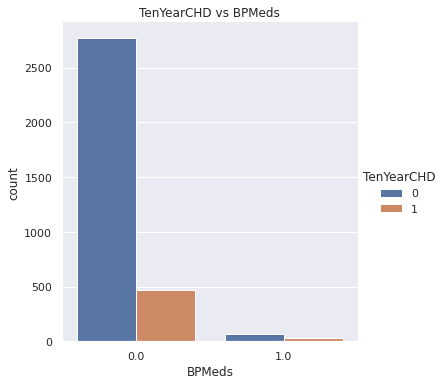

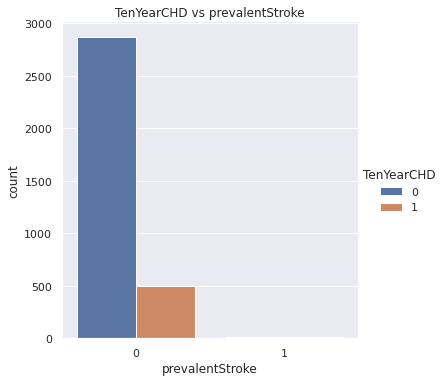

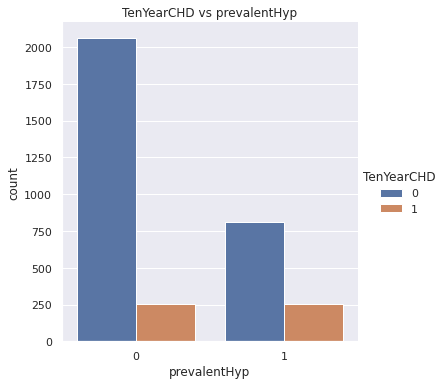

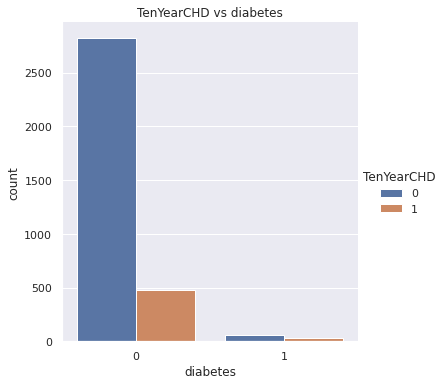

In [ ]:
# Dependent variable vs categorical features

for i, ii in enumerate(cat_cols[:-1]):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, hue=cat_cols[-1], kind='count')
  plt.title(f'TenYearCHD vs {ii}')
  plt.show()

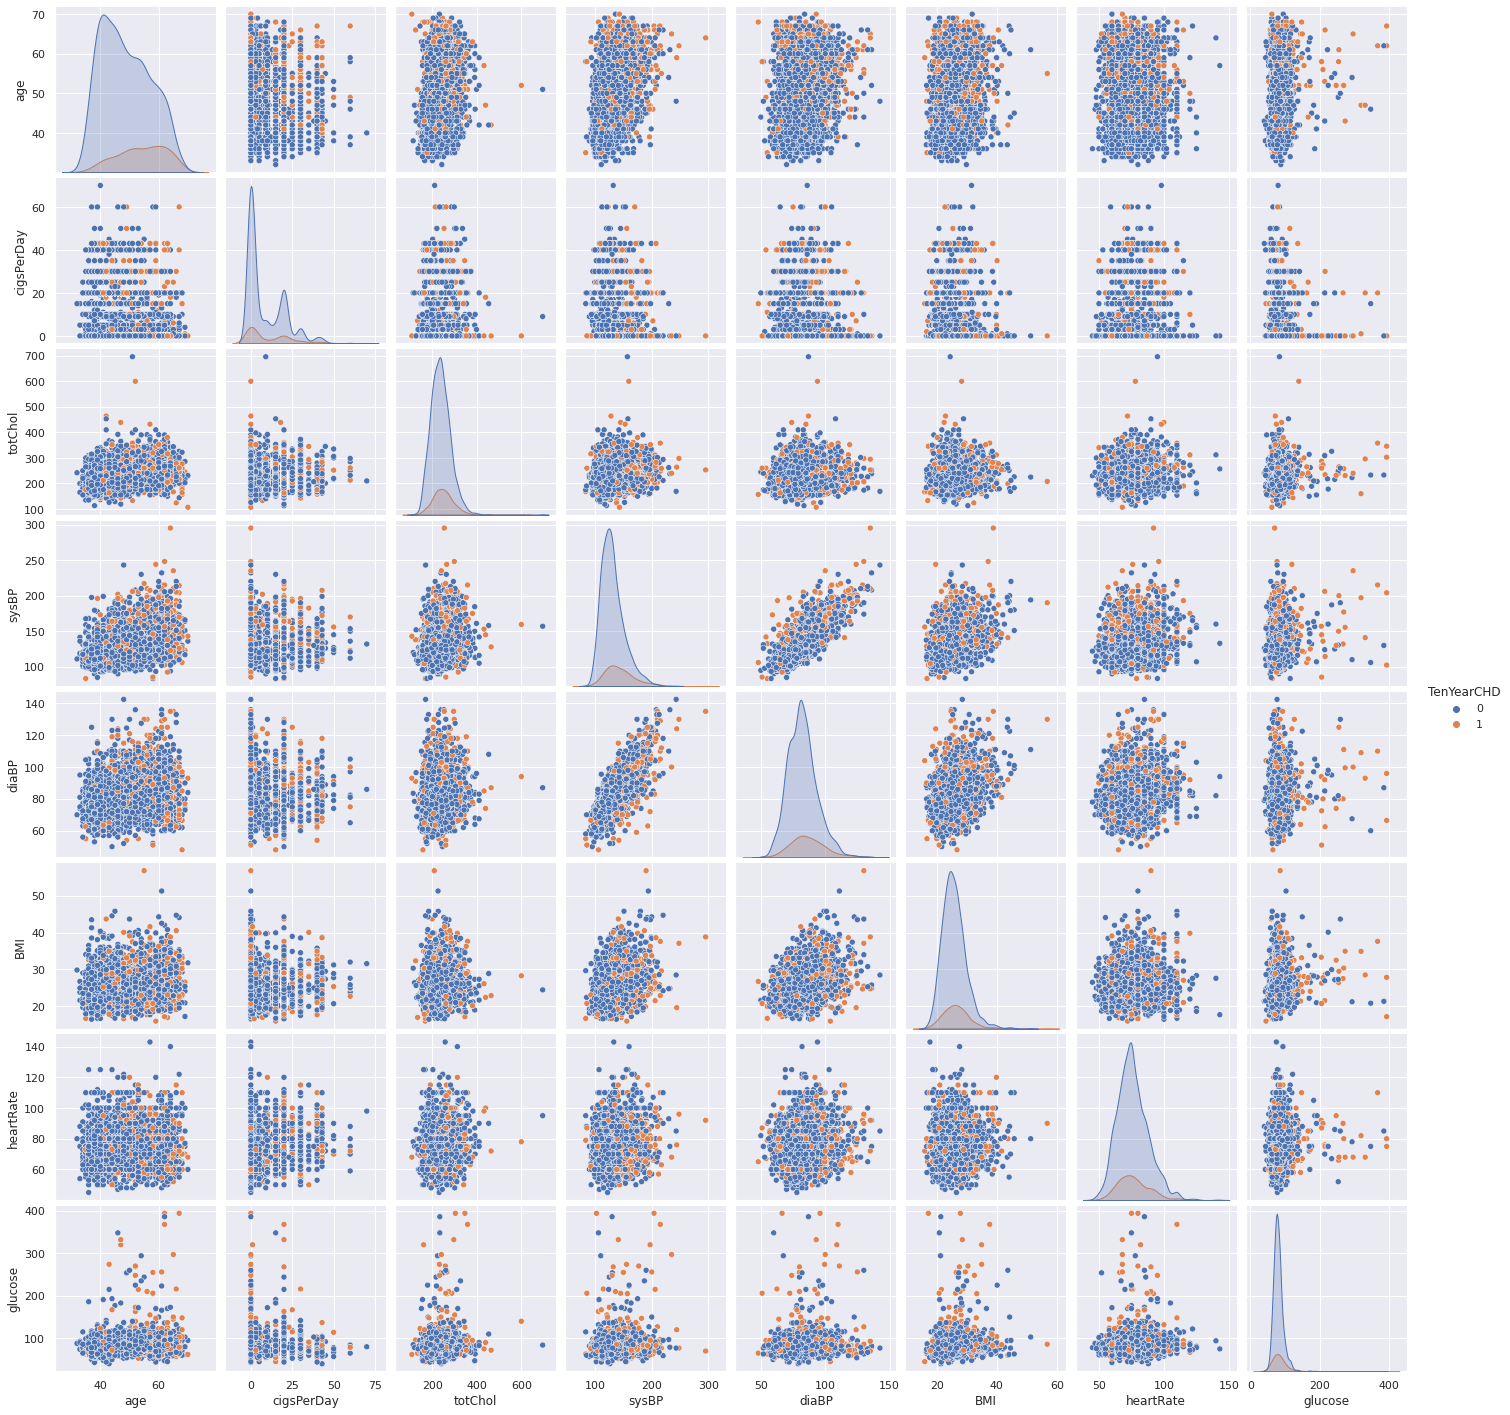

In [ ]:
# pairplot - for numerical features

sns.pairplot(data=df, vars=num_cols, hue=cat_cols[-1])
plt.show()

We don't see any significant patterns in the data with respect to numerical fields

In [ ]:
# Dropping id column

df.drop('id', inplace=True, axis=1)

In [ ]:
df_new = df.copy()

In [ ]:
# Encoding categorical to numeric for plotting heatmap

df_new['sex_num'] = np.where(df.sex=='F', 1, 0)
df_new['is_smoking_num'] = np.where(df['is_smoking']=='YES', 1, 0)

In [ ]:
df_new.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_num,is_smoking_num
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,1,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,1


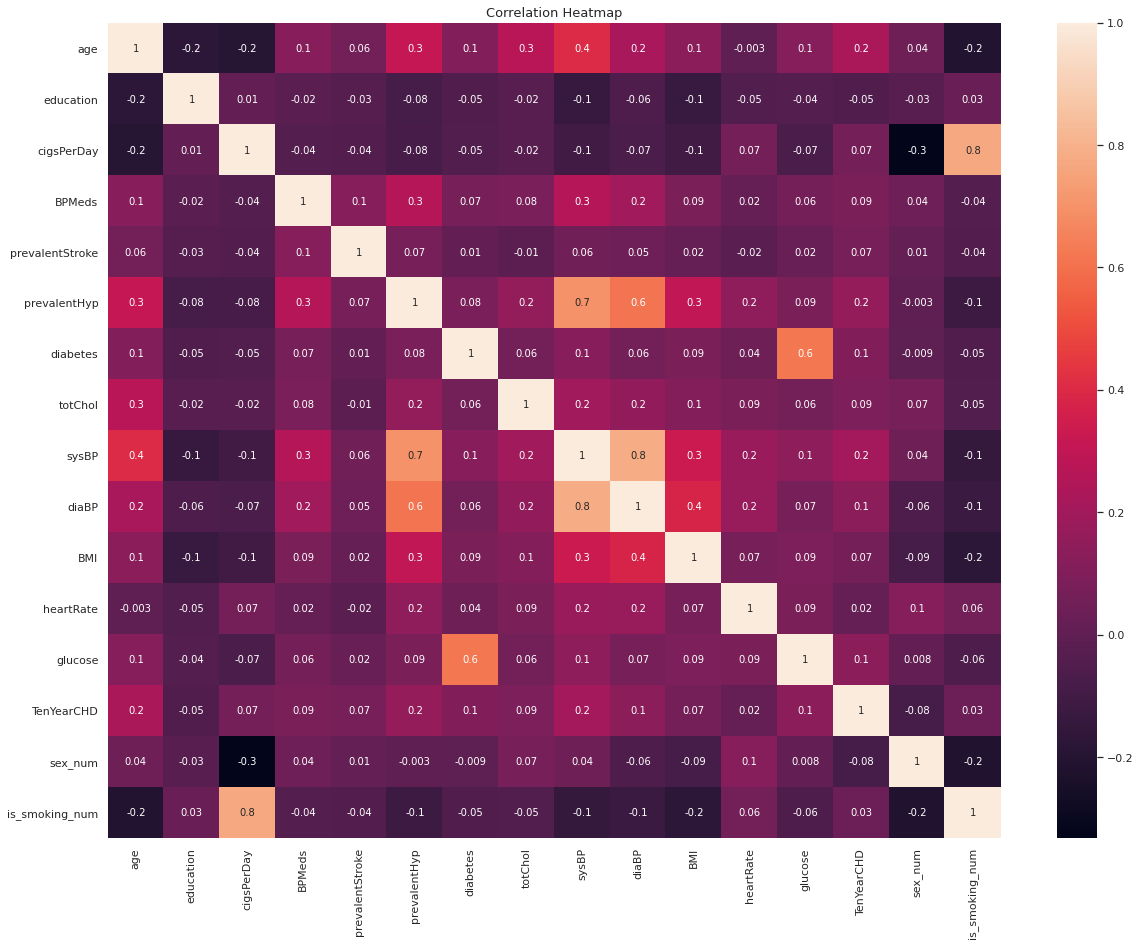

In [ ]:
# Correlation Heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df_new.corr(), annot = True, fmt='.1g')
plt.title('Correlation Heatmap', fontsize=13)
plt.show()

* There are no features that have a correlation with the dependant variable. 
* We see some obvious correlations between - sysBP and diaBP and prevalentHP, glucose and diabetes, is_smoking and cigsPerDay

### Data Preprocessing

#### Handling Missing Values

In [ ]:
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**Education** <br>
Has 87 missing values. It is a categorical variable. We have no information about this feature. It also has no correlation with the dependant variable. And we have no further information about education. We will drop this feature.

In [ ]:
df.drop('education', inplace=True, axis=1)

**cigsPerDay** <br>
Has 22 missing values. All the 22 records have is_smoking = YES. This is a continuous variable. We check the distribution of the feature when is_smoking = YES. When is_smoking = NO, cigsPerDay will be 0.

In [ ]:
df[df['cigsPerDay'].isnull()]['is_smoking'].value_counts()

YES    22
Name: is_smoking, dtype: int64

In [ ]:
df.groupby(['cigsPerDay','is_smoking'])['cigsPerDay'].count().unstack()

is_smoking,NO,YES
cigsPerDay,,
0.0,1703.0,NaN
1.0,NaN,48.0
2.0,NaN,17.0
3.0,NaN,79.0
4.0,NaN,7.0
5.0,NaN,103.0
6.0,NaN,14.0
7.0,NaN,8.0
8.0,NaN,10.0


* As we can see from the table, when is_smoking = NO, the number of cigarettes smoked is 0.
* We can see that the mode of cigsPerDay for the class is_smoking = YES is 20.

In [ ]:
print('is_smoking = YES \n')
print('** mean of cigsPerDay =', df[df['is_smoking']=='YES']['cigsPerDay'].mean())
print('** median of cigsPerDay =', df[df['is_smoking']=='YES']['cigsPerDay'].median())
print('** mode of cigsPerDay =', df[df['is_smoking']=='YES']['cigsPerDay'].mode())

is_smoking = YES 

** mean of cigsPerDay = 18.345945945945946
** median of cigsPerDay = 20.0
** mode of cigsPerDay = 0    20.0
dtype: float64


We can see that the median and mode are the same, and the mean is pretty close to median and mode. We can impute the missing values with either median or mode, which is 20

In [ ]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[df['is_smoking']=='YES']['cigsPerDay'].median())

**BPMeds** <br>
Has 44 missing values. Impute the missing values with mode - this is a nominal feature.

In [ ]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())

In [ ]:
df['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

**totchol** <br>
totchol is a continuous value. There are 38 missing values. It has no correlation with any of the other features.

In [ ]:
df[['totChol']].describe()

,totChol
count,3352.000000
mean,237.074284
std,45.247430
min,107.000000
25%,206.000000
50%,234.000000
75%,264.000000
max,696.000000


We can see the mean and median are very close to each other. We will impute the missing values with median.

In [ ]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

**BMI and heartrate** <br>
BMI has 14 missing values and heartrate has 1 missing value. 

In [ ]:
df[['BMI', 'heartRate']].describe()

,BMI,heartRate
count,3376.000000,3389.000000
mean,25.794964,75.977279
std,4.115449,11.971868
min,15.960000,45.000000
25%,23.020000,68.000000
50%,25.380000,75.000000
75%,28.040000,83.000000
max,56.800000,143.000000


We will impute the median for missing values in BMI and heartRate.

In [ ]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

**glucose** <br>
Has 304 missing values

In [ ]:
df[df['glucose'].isnull()]['diabetes'].value_counts()

0    301
1      3
Name: diabetes, dtype: int64

In [ ]:
print('diabetes = NO \n')
print('** mean of glucose =', df[df['diabetes']==0]['glucose'].mean())
print('** median of glucose =', df[df['diabetes']==0]['glucose'].median())
print('** mode of glucose =', df[df['diabetes']==0]['glucose'].mode())

diabetes = NO 

** mean of glucose = 79.57161892071952
** median of glucose = 78.0
** mode of glucose = 0    75.0
dtype: float64


In [ ]:
print('diabetes = YES \n')
print('** mean of glucose =', df[df['diabetes']==1]['glucose'].mean())
print('** median of glucose =', df[df['diabetes']==1]['glucose'].median())
print('** mode of glucose =', df[df['diabetes']==1]['glucose'].mode())

diabetes = YES 

** mean of glucose = 171.96428571428572
** median of glucose = 150.0
** mode of glucose = 0    120.0
dtype: float64


In [ ]:
df['glucose'] = np.where(df['diabetes']==0, df['glucose'].fillna(df[df['diabetes']==0]['glucose'].median()), df['glucose'].fillna(df[df['diabetes']==1]['glucose'].median()))

In [ ]:
# check if all missing values have been treated

df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### Creating Bins for Cigsperday

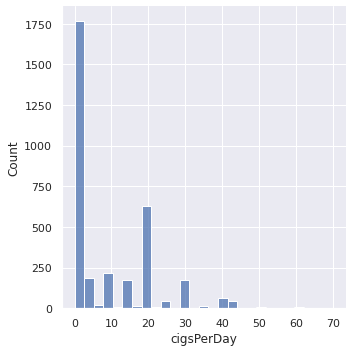

In [ ]:
sns.displot(df.cigsPerDay)
plt.show()

In [ ]:
df[df.cigsPerDay==0]['TenYearCHD'].value_counts()

0    1467
1     236
Name: TenYearCHD, dtype: int64

In [ ]:
df[(df.cigsPerDay<=20)&(df.cigsPerDay>0)]['TenYearCHD'].value_counts()

0    1125
1     198
Name: TenYearCHD, dtype: int64

In [ ]:
df[(df.cigsPerDay>20)]['TenYearCHD'].value_counts()

0    287
1     77
Name: TenYearCHD, dtype: int64

so from here we can see there can be three categories in cigs per day , as the ratio of target varible get changed .
So we see that , the all over ratio in target variable is 1:6 but for cigg per day greater than equal to 20 it is around 1:3 that is double to get a attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


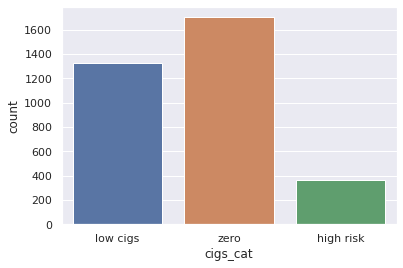

In [ ]:
def cig_cat(x):
  if x==0:
    return "zero"
  elif x>0 and x<=20:
    return "low cigs"
  elif x>20:
    return "high risk"
df['cigs_cat']=df.cigsPerDay.apply(cig_cat)
sns.countplot(df['cigs_cat'])
plt.show()

#### Doing Log tranformation on skewed data

In [ ]:
for i in  ['glucose','heartRate','BMI','totChol','sysBP']:
  df[i]=np.log(df[i])

In [ ]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigs_cat
0,64,F,YES,3.0,0.0,0,0,0,5.398163,4.997212,85.0,3.233961,4.499810,4.382027,1,low cigs
1,36,M,NO,0.0,0.0,0,1,0,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,0,zero
2,46,F,YES,10.0,0.0,0,0,0,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,0,low cigs
3,50,M,YES,20.0,0.0,0,1,0,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,low cigs
4,64,F,YES,30.0,0.0,0,0,0,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,high risk


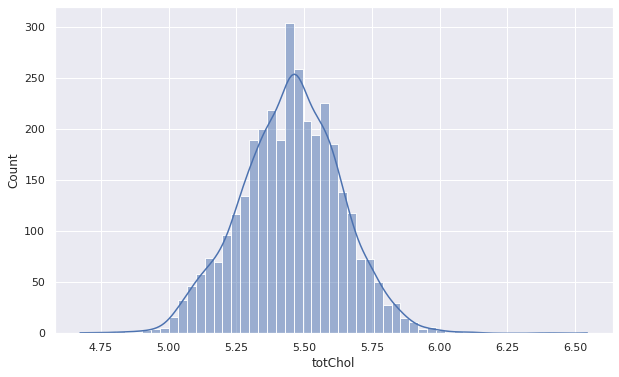

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='totChol', kde=True)
plt.show()

#### One Hot encoding on categorical features

In [ ]:
df=pd.get_dummies(df, columns=['sex','is_smoking','cigs_cat'],drop_first=True)
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES,cigs_cat_low cigs,cigs_cat_zero
0,64,3.0,0.0,0,0,0,5.398163,4.997212,85.0,3.233961,4.499810,4.382027,1,0,1,1,0
1,36,0.0,0.0,0,1,0,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,0,1,0,0,1
2,46,10.0,0.0,0,0,0,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,0,0,1,1,0
3,50,20.0,0.0,0,1,0,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,1,1,1,0
4,64,30.0,0.0,0,0,0,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,0,1,0,0


### Preparing Data for Modelling

In [ ]:
# splitting into X and y

X=df.drop(['TenYearCHD','cigsPerDay'],axis=1)
y=df['TenYearCHD']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   BPMeds             3390 non-null   float64
 2   prevalentStroke    3390 non-null   int64  
 3   prevalentHyp       3390 non-null   int64  
 4   diabetes           3390 non-null   int64  
 5   totChol            3390 non-null   float64
 6   sysBP              3390 non-null   float64
 7   diaBP              3390 non-null   float64
 8   BMI                3390 non-null   float64
 9   heartRate          3390 non-null   float64
 10  glucose            3390 non-null   float64
 11  sex_M              3390 non-null   uint8  
 12  is_smoking_YES     3390 non-null   uint8  
 13  cigs_cat_low cigs  3390 non-null   uint8  
 14  cigs_cat_zero      3390 non-null   uint8  
dtypes: float64(7), int64(4), uint8(4)
memory usage: 304.7 KB


In [ ]:
print(X.shape)
print(y.shape)

(3390, 15)
(3390,)


#### Splitting our Data

In [ ]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=196, test_size=0.25, stratify=y)

the stratify= y parameter gives us the stratified sampling , ie ratio of both the classes remain same in our sampled train and test data

#### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Handling class imbalance

we wil try using both SMOTE Technnique and using class weights for handling imbalance in the data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# the numbers before SMOTE
num_before = dict(Counter(y_train))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

#using class_wieghts

class_weight = {0: 1,
                1: 6}

{0: 2159, 1: 383} {0: 2158, 1: 1727}


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

### Modelling - Using Class Weights to Handle Class Imbalance

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,accuracy_score
eval=pd.DataFrame()

In [ ]:
def Logistic_model(x_tr,y_tr,x_te,y_te):
   
  #model 

  from sklearn.linear_model import LogisticRegression
  class_weight = {0: 1,
                1: 6}
  model=LogisticRegression(class_weight=class_weight)
  model.fit(x_tr,y_tr)
  model.get_params
  #testing on Recall score
  y_train_pred=model.predict(x_tr)
  #print(classification_report(y_tr,y_train_pred))
  y_pred=model.predict(x_te)
  #print(classification_report(y_te,y_pred))
  from sklearn.metrics import recall_score
  #print(f'Recall score for train data using Logistic with Class weights : {recall_score(y_tr,y_train_pred)}')
  #print(f'Recall score for test data using Logistic with Class Weights : {recall_score(y_te,y_pred)}')
  
  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=y_te,y_pred


  ##testing for ROC-AUC 
  ytrain_pred = model.predict_proba(x_tr)
  #print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_te)
  #print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  #print(accuracy_score(y_te,y_pred))

  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=recall_score(y_te,y_pred)
  train_roc=roc_auc_score(y_tr, ytrain_pred[:,1])
  test_roc=roc_auc_score(y_te, ytest_pred[:,1])

  evaluation=pd.DataFrame({'Model':'Logistic','Train Accuracy':train_acc,'Test Accuracy':test_acc,'Train Recall':train_recall,'Test Recall':test_recall,'Train ROC':train_roc,'Test ROC':test_roc},index=[1])
  return evaluation

Logistic_model(X_train,y_train,X_test,y_test)

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC,Test ROC
1,Logistic,0.660897,0.630896,0.704961,0.679688,0.737491,0.704112


We see that even dealing with class imbalance , we are not getting significant result with Recall score

#### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
def svm_model(x_train,y_tr,x_test,y_te):

  #model

  from sklearn import svm
  from sklearn.model_selection import GridSearchCV 
  model= svm.SVC(class_weight=class_weight,probability=True)
  model.fit(x_train,y_tr)
  
  #testing for recall
  y_train_pred=model.predict(x_train)
  print(classification_report(y_tr,y_train_pred))
  y_pred=model.predict(x_test)
  print(classification_report(y_te,y_pred))
  print(f'Recall score for train data using SVM : {recall_score(y_tr,y_train_pred)}')
  print(f'Recall score for test data using SVM : {recall_score(y_te,y_pred)}')
  

  ##testing for ROC-AUC 
  ytrain_pred = model.predict_proba(x_train)
  print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_test)
  print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))


svm_model(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2159
           1       0.36      0.78      0.49       383

    accuracy                           0.76      2542
   macro avg       0.65      0.76      0.66      2542
weighted avg       0.86      0.76      0.79      2542

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       720
           1       0.25      0.55      0.34       128

    accuracy                           0.68       848
   macro avg       0.57      0.62      0.56       848
weighted avg       0.80      0.68      0.72       848

Recall score for train data using SVM : 0.7780678851174935
Recall score for test data using SVM : 0.546875
RF train roc-auc: 0.8282410022046277
RF test roc-auc: 0.6830078125
Accuracy score :0.6780660377358491


but still we se a less score on the test set, meaning that our model is getting  overfitted . As in SVM here train recall score is good but test score is not good

#### SVM with Cross validation  and HyperParameter tuning

In [ ]:
def svm_tuned(x_train,y_tr,x_test,y_te):

  #model 
  from sklearn.model_selection import GridSearchCV 
  from sklearn import svm

  param_dict = {'C': [0.1,1,10],  
              'kernel': ['rbf','poly','linear']} 
  model= svm.SVC(probability=True,class_weight=class_weight)
  grid = GridSearchCV(model, param_dict,n_jobs=2,cv=5, verbose = 10,scoring='recall') 
  grid.fit(x_train,y_tr)
  print(model.get_params)

  #testing for Recall

  y_train_pred=grid.predict(x_train)
  #print(classification_report(y_tr,y_train_pred))
  y_pred=grid.predict(x_test)
  #print(classification_report(y_te,y_pred))
  from sklearn.metrics import recall_score,accuracy_score,roc_auc_score,roc_curve
  #print(f'Recall score for train data using SVM with CV and tuning : {recall_score(y_tr,y_train_pred)}')
  #print(f'Recall score for test data using SVM with CV and tuning : {recall_score(y_te,y_pred)}')

  ##testing for ROC-AUC 
  ytrain_pred = grid.predict_proba(x_train)
  #print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = grid.predict_proba(x_test)
  #print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  #print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))
  
  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=recall_score(y_te,y_pred)
  train_roc=roc_auc_score(y_tr, ytrain_pred[:,1])
  test_roc=roc_auc_score(y_te, ytest_pred[:,1])

  evaluation=pd.DataFrame({'Model':'SVM','Train Accuracy':train_acc,'Test Accuracy':test_acc,'Train Recall':train_recall,'Test Recall':test_recall,'Train ROC':train_roc,'Test ROC':test_roc},index=[1])
  return evaluation

svm_tuned(X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   10.2s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   15.1s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   21.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   30.0s
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:   56.9s finished


<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 1, 1: 6},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC,Test ROC
1,SVM,0.670732,0.610849,0.754569,0.679688,0.765585,0.682617


#### XGB without using Tuning

In [ ]:
def xgb_model(x_train,y_tr,x_test,y_te):

  from xgboost import XGBClassifier
  model=XGBClassifier(scale_pos_weight=6)
  model.fit(x_train,y_tr)

  y_train_pred=model.predict(x_train)
  y_pred=model.predict(x_test)
  print(f'Recall score for train data using Xgboost: {recall_score(y_tr,y_train_pred)}')
  print(f'Recall score for test data using Xgboost: {recall_score(y_te,y_pred)}')

  ##testing for ROC-AUC 
  ytrain_pred = model.predict_proba(x_train)
  print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_test)
  print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))

xgb_model(X_train,y_train,X_test,y_test)

Recall score for train data using Xgboost: 0.8120104438642297
Recall score for test data using Xgboost: 0.5703125
RF train roc-auc: 0.8591408603489914
RF test roc-auc: 0.6776041666666667
Accuracy score :0.6485849056603774


Again , our Xgboost model performs well in the training set but , does not perform well on the Test set


####XGBoost with hyper parameter tuning

In [ ]:
def xgb_tuned(x_train,y_tr,x_test,y_te):
  from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
  from xgboost import XGBClassifier
  space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
          'gamma': hp.uniform ('gamma', 1,9),
          'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
          'reg_lambda' : hp.uniform('reg_lambda', 0,1),
          'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
          'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
          'n_estimators': 180,
          'seed': 0
      }
  def objective(space):
      clf=XGBClassifier(
                      n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                      reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                      colsample_bytree=int(space['colsample_bytree']),scale_pos_weight=8,random_state=22)
      
      
      clf.fit(x_train, y_tr)
      

      pred = clf.predict(x_test)
      #print(pred)
      roc = recall_score(y_te, pred>0.5)
      
      return {'loss': -roc, 'status': STATUS_OK }

  trials = Trials()
  best_hyperparams = fmin(fn = objective,
                          space = space,
                          algo = tpe.suggest,
                          max_evals = 100,
                          trials = trials)
  
  #print("The best hyperparameters are : ","\n")
  print(best_hyperparams)

  model=XGBClassifier(colsample_bytree=best_hyperparams['colsample_bytree'],
                                 gamma=best_hyperparams['gamma'],
                                 max_depth=int(best_hyperparams['max_depth']),
                                 min_child_weight=best_hyperparams['min_child_weight'],
                                 reg_alpha=best_hyperparams['reg_alpha'],
                                 reg_lambda=best_hyperparams['reg_lambda'],random_state=1,scale_pos_weight=8)
  

  model.fit(x_train,y_tr)
  y_train_pred=model.predict(x_train)
  y_pred=model.predict(x_test)

  print(model.get_params)

  #print(f'Recall score for train data using Xgboost with tuning: {recall_score(y_tr,y_train_pred)}')
  #print(f'Recall score for test data using Xgboost with tuning: {recall_score(y_te,y_pred)}')

  ytrain_pred = model.predict_proba(x_train)
  #print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_test)
  #print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  #print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))

  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=recall_score(y_te,y_pred)
  train_roc=roc_auc_score(y_tr, ytrain_pred[:,1])
  test_roc=roc_auc_score(y_te, ytest_pred[:,1])

  evaluation=pd.DataFrame({'Model':'Xg Boost','Train Accuracy':train_acc,'Test Accuracy':test_acc,'Train Recall':train_recall,'Test Recall':test_recall,'Train ROC':train_roc,'Test ROC':test_roc},index=[1])
  return evaluation


xgb_tuned(X_train,y_train,X_test,y_test)



100%|██████████| 100/100 [00:14<00:00,  7.09it/s, best loss: -0.890625]
{'colsample_bytree': 0.7112009438790405, 'gamma': 8.547685024198005, 'max_depth': 17.0, 'min_child_weight': 4.0, 'reg_alpha': 171.0, 'reg_lambda': 0.4011857104522021}
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7112009438790405,
              gamma=8.547685024198005, learning_rate=0.1, max_delta_step=0,
              max_depth=17, min_child_weight=4.0, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=1, reg_alpha=171.0,
              reg_lambda=0.4011857104522021, scale_pos_weight=8, seed=None,
              silent=None, subsample=1, verbosity=1)>


,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC,Test ROC
1,Xg Boost,0.472856,0.441038,0.859008,0.84375,0.706123,0.66588


In [ ]:
model_metrics = Logistic_model(X_train,y_train,X_test,y_test).append([svm_tuned(X_train,y_train,X_test,y_test), xgb_tuned(X_train,y_train,X_test,y_test)])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    8.8s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   13.6s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   19.6s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   28.3s
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:   54.9s finished


<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 1, 1: 6},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>
100%|██████████| 100/100 [00:14<00:00,  7.11it/s, best loss: -0.890625]
{'colsample_bytree': 0.866842211657184, 'gamma': 3.94281246911597, 'max_depth': 8.0, 'min_child_weight': 8.0, 'reg_alpha': 180.0, 'reg_lambda': 0.4138470510138498}
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.866842211657184,
              gamma=3.94281246911597, learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=8.0, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=1, reg_alpha=180.0, reg_lambda=0.41384

In [ ]:
model_metrics

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC,Test ROC
1,Logistic,0.660897,0.630896,0.704961,0.679688,0.737491,0.704112
1,SVM,0.670732,0.610849,0.754569,0.679688,0.765725,0.682617
1,Xg Boost,0.481117,0.454009,0.864230,0.843750,0.713594,0.671522


* We can see that XGBoost gives us the best recall score
* We want to improve recall as it gives us the sensitivity. 

### Modelling - using smote to handle class imbalance

In [ ]:
# Define function for training model

def build_model(model, param_dict, xtrain, ytrain):

  grid = GridSearchCV(estimator=model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='recall')

  grid.fit(xtrain, ytrain)
  optimal_model = grid.best_estimator_

  print('\n\n\n')
  print('Best Parameters =', grid.best_params_)

  return optimal_model

In [ ]:
# Function for prediction and printing metrics

def predict(model_name, optimal_model, xtrain, xtest, ytrain, ytest):

  train_pred = optimal_model.predict(xtrain)
  test_pred = optimal_model.predict(xtest)

  print('Classification report for train')
  print(classification_report(ytrain,train_pred))

  print('\n')
  print('Classification report for test')
  print(classification_report(ytest,test_pred))

  print('\n')
  print('Accuracy for train =', accuracy_score(ytrain, train_pred))
  print('Accuracy for test =', accuracy_score(ytest, test_pred))

  print('\n')
  print('Recall for train =', recall_score(ytrain, train_pred))
  print('Recall for test =', recall_score(ytest, test_pred))

  print('\n')
  print('ROC_AUC score for train =', roc_auc_score(ytrain, train_pred))
  print('ROC_AUC score for test =', roc_auc_score(ytest, test_pred))

  
  cm_train = confusion_matrix(y_smote, train_pred)
  cm_test = confusion_matrix(y_test, test_pred)
  
  conf_matrix_train = pd.DataFrame(data = cm_train, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  conf_matrix_test = pd.DataFrame(data = cm_test, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

  print('\n\n\n\n')
  
  # plt.figure(figsize = (8,5))
  
  f, axes = plt.subplots(1, 2, figsize=(15,7))
  sns.heatmap(conf_matrix_train, annot=True, fmt='d', ax=axes[0])
  axes[0].set_title('Confusion matrix for Train')

  sns.heatmap(conf_matrix_test, annot=True, fmt='d', ax=axes[1])
  axes[1].set_title('Confusion matrix for Test')
  plt.show()

In [ ]:
x=19120

#### Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
param_dict_lr = {'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6]}

In [ ]:
lr_optimal_model = build_model(lr, param_dict_lr, X_smote, y_smote)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.4s finished


Classification report for train
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2158
           1       0.67      0.61      0.64      1727

    accuracy                           0.69      3885
   macro avg       0.69      0.69      0.69      3885
weighted avg       0.69      0.69      0.69      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       720
           1       0.27      0.53      0.36       128

    accuracy                           0.71       848
   macro avg       0.58      0.64      0.58       848
weighted avg       0.80      0.71      0.74       848



Accuracy for train = 0.693951093951094
Accuracy for test = 0.7099056603773585


Recall for train = 0.6079907353792704
Recall for test = 0.53125


ROC_AUC score for train = 0.6853670080974201
ROC_AUC score for test = 0.6364583333333333







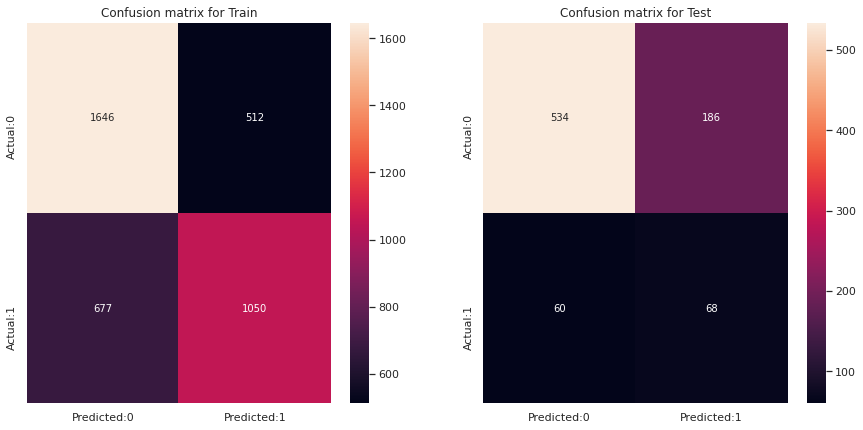

In [ ]:
predict('Logistic Regression', lr_optimal_model, X_smote, X_test, y_smote, y_test)

In [ ]:
lr_optimal_model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

#### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=x)

In [ ]:
param_dict_dt = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[3,4,5,6,7,8,9,10,11]}

In [ ]:
dt_optimal_model = build_model(dt, param_dict_dt, X_smote, y_smote)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] max_features=auto, min_sa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=7 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] max_featu

[Parallel(n_jobs=1)]: Done 1890 out of 1890 | elapsed:   17.2s finished


Classification report for train
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2158
           1       0.90      0.86      0.88      1727

    accuracy                           0.89      3885
   macro avg       0.90      0.89      0.89      3885
weighted avg       0.89      0.89      0.89      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       720
           1       0.20      0.34      0.26       128

    accuracy                           0.70       848
   macro avg       0.54      0.55      0.53       848
weighted avg       0.77      0.70      0.73       848



Accuracy for train = 0.8947232947232947
Accuracy for test = 0.6992924528301887


Recall for train = 0.8575564562825709
Recall for test = 0.34375


ROC_AUC score for train = 0.8910117777242327
ROC_AUC score for test = 0.553125







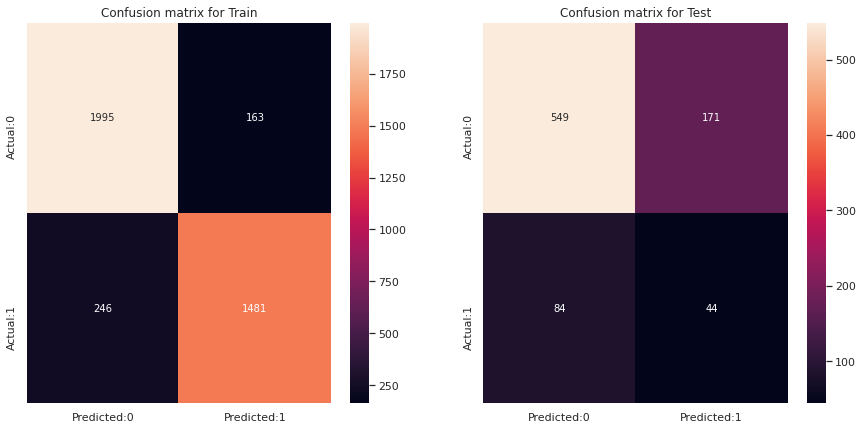

In [ ]:
predict('Decision Tree', dt_optimal_model, X_smote, X_test, y_smote, y_test)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=x)

In [ ]:
param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100],
  }

In [ ]:
rf_optimal_model = build_model(rf, param_dict_rf, X_smote, y_smote)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.1min finished






Best Parameters = {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


Classification report for train
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2158
           1       0.74      0.65      0.69      1727

    accuracy                           0.74      3885
   macro avg       0.74      0.73      0.74      3885
weighted avg       0.74      0.74      0.74      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       720
           1       0.26      0.45      0.33       128

    accuracy                           0.72       848
   macro avg       0.57      0.61      0.58       848
weighted avg       0.79      0.72      0.75       848



Accuracy for train = 0.7428571428571429
Accuracy for test = 0.7205188679245284


Recall for train = 0.6543138390272148
Recall for test = 0.453125


ROC_AUC score for train = 0.7340151215525325
ROC_AUC score for test = 0.6105902777777777







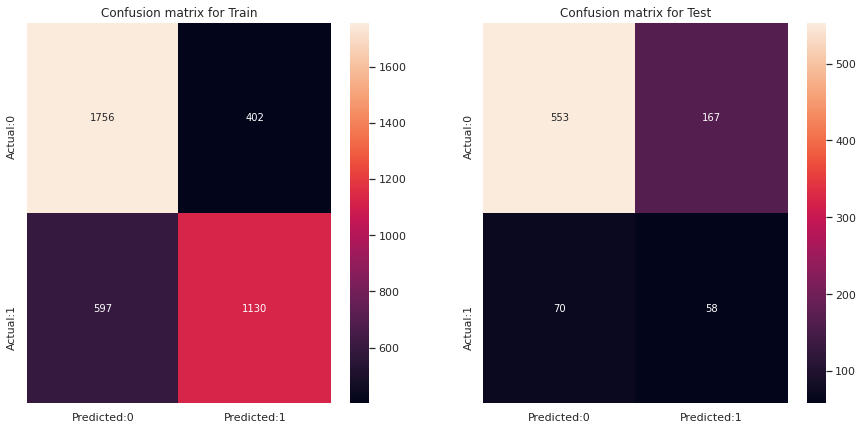

In [ ]:
predict('Random Forest', rf_optimal_model, X_smote, X_test, y_smote, y_test)

In [ ]:
features = X.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)

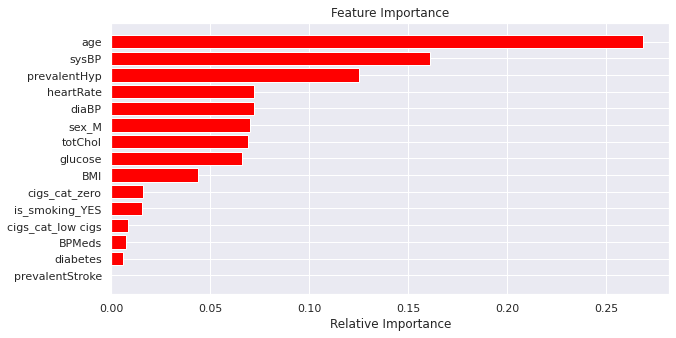

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=x)

In [ ]:
param_dict_xgb = {
    'max_depth': range (2, 5, 6),
    'learning_rate': [0.05, 0.01, 0.1],
    'min_child_weight': [1,3,4]
    }

In [ ]:
xgb_optimal_model  = build_model(xgb, param_dict_xgb, X_smote, y_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=3 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=3, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=3 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=3, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=3 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=3, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=3 ......

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    8.1s finished






Best Parameters = {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1}


Classification report for train
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2158
           1       0.76      0.71      0.73      1727

    accuracy                           0.77      3885
   macro avg       0.77      0.76      0.77      3885
weighted avg       0.77      0.77      0.77      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       720
           1       0.27      0.45      0.34       128

    accuracy                           0.73       848
   macro avg       0.58      0.62      0.59       848
weighted avg       0.80      0.73      0.76       848



Accuracy for train = 0.7698841698841699
Accuracy for test = 0.7346698113207547


Recall for train = 0.7099015634047481
Recall for test = 0.4453125


ROC_AUC score for train = 0.7638942478747559
ROC_AUC score for test = 0.6157118055555555







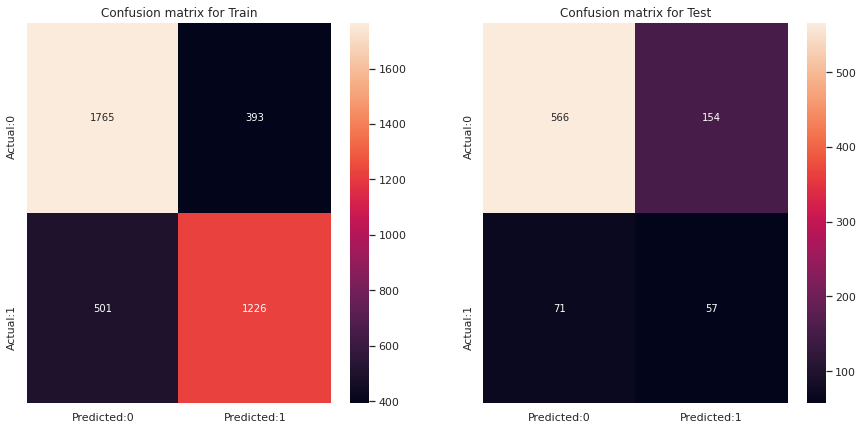

In [ ]:
predict('XGBoost', xgb_optimal_model, X_smote, X_test, y_smote, y_test)

In [ ]:
features = X.columns
importances = xgb_optimal_model.feature_importances_
indices = np.argsort(importances)

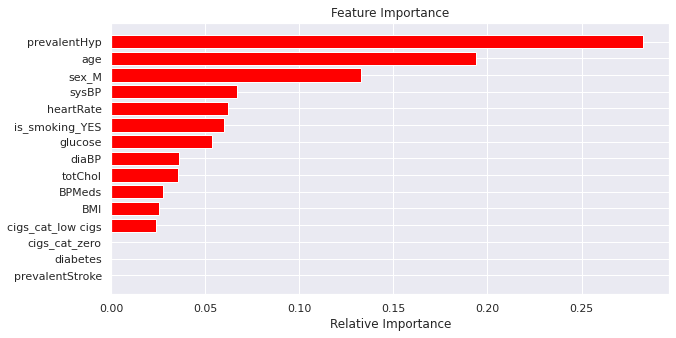

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### Conclusion

In [ ]:
models = [lr_optimal_model, dt_optimal_model, rf_optimal_model, xgb_optimal_model]

In [ ]:
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
               
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(4)
        df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(4)
        df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(4)
        df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(4)
        df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(4)
        df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(4)
        
        i+=1

    return(df)

In [ ]:
model_smote=score_model(X_smote,y_smote,X_test,y_test)
print('Scores using SMOTE')
model_smote

Scores using SMOTE


,Model_Name,Train accuracy,Test accuracy,Train recall,Test recall,Train ROC-AUC,Test ROC-AUC
0,LogisticRegression,0.6940,0.7099,0.6080,0.5312,0.6854,0.6365
1,DecisionTreeClassifier,0.8947,0.6993,0.8576,0.3438,0.8910,0.5531
2,RandomForestClassifier,0.7429,0.7205,0.6543,0.4531,0.7340,0.6106
3,XGBClassifier,0.7699,0.7347,0.7099,0.4453,0.7639,0.6157


In [ ]:
print('Scores using CLass Weights')
model_metrics

Scores using CLass Weights


,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC,Test ROC
1,Logistic,0.660897,0.630896,0.704961,0.679688,0.737491,0.704112
1,SVM,0.670732,0.610849,0.754569,0.679688,0.765725,0.682617
1,Xg Boost,0.481117,0.454009,0.864230,0.843750,0.713594,0.671522


* We can see that XGBoost and Random Forest perform better while using SMOTE. Even though we get good model accuracy, we do not get good recall scores.
* XGBoost performs better while using class weight. 

### SHAP

In [ ]:
pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer_train = shap.TreeExplainer(xgb_optimal_model)
shap_values_train = explainer_train.shap_values(X_smote)

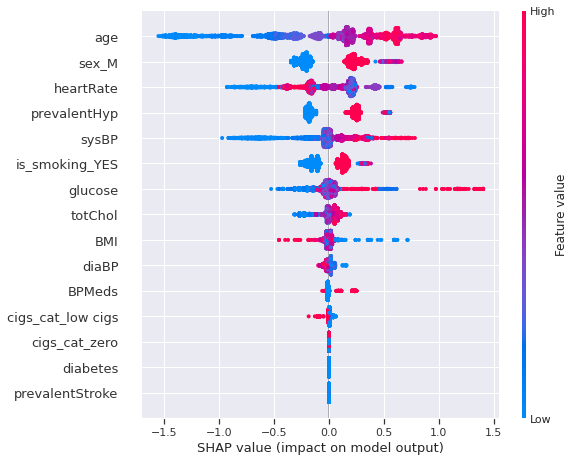

In [ ]:
shap.summary_plot(shap_values_train,X_smote,feature_names=list(X.columns),plot_type='dot')

In [ ]:
explainer_test = shap.TreeExplainer(xgb_optimal_model)
shap_values_test = explainer_test.shap_values(X_test)

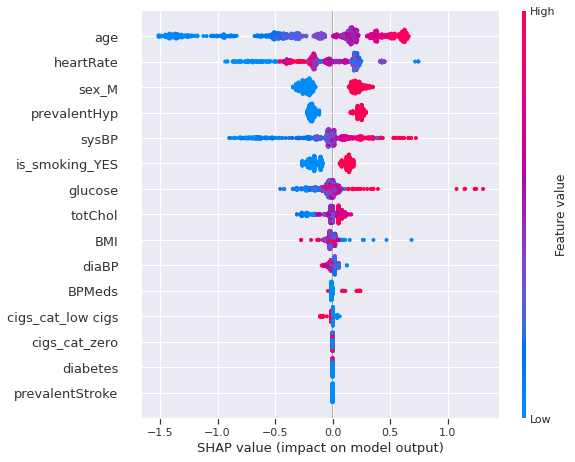

In [ ]:
shap.summary_plot(shap_values_test,X_test,feature_names=list(X.columns),plot_type='dot')

In [ ]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(xgb_optimal_model)
    shap_values_Model = explainerModel.shap_values(X_test)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], X_test[j])
    return(p)

In [ ]:
shap.initjs()
shap_plot(1)

Using SHAP we can see the feature importance and how they are contribution toward the prediction